In [27]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/32/07/3d355f71fb32f9d780d0099ece83dd10f0b9b71a9359cd468f3c25c52bfc/wordcloud-1.9.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 1.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn.objects as so
from dotenv import load_dotenv
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd 
import boto3
import io
import os

load_dotenv()

True

In [2]:
bucket = os.getenv('AWS_BUCKET_NAME')
access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
secret_key = os.getenv('AWS_PRIVATE_KEY')

s3_client = boto3.client(
        's3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_key)

read_response = s3_client.get_object(Bucket=bucket, Key='EPL 2024-2025 xG.csv')

xG_df = pd.read_csv(io.BytesIO(read_response['Body'].read()))


In [18]:
xG_df['xGD cumulative sum'] = xG_df['xGD_sum_over_gameweek']

In [22]:
top_5_xGD = xG_df[xG_df['team'].isin(['Manchester City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham'])]

In [23]:
top_5_xGD.head()

,gameweek,date,team,xGA,xG,xGD,xGD_sum_over_gameweek,xGD cumulative sum
2,1.0,2024-08-17,Arsenal,0.5,1.2,0.7,0.7,0.7
13,1.0,2024-08-17,Liverpool,0.5,2.6,2.1,2.1,2.1
14,1.0,2024-08-18,Manchester City,1.0,0.8,-0.2,-0.2,-0.2
17,1.0,2024-08-18,Chelsea,0.8,1.0,0.2,0.2,0.2
19,1.0,2024-08-19,Tottenham,1.0,1.2,0.2,0.2,0.2


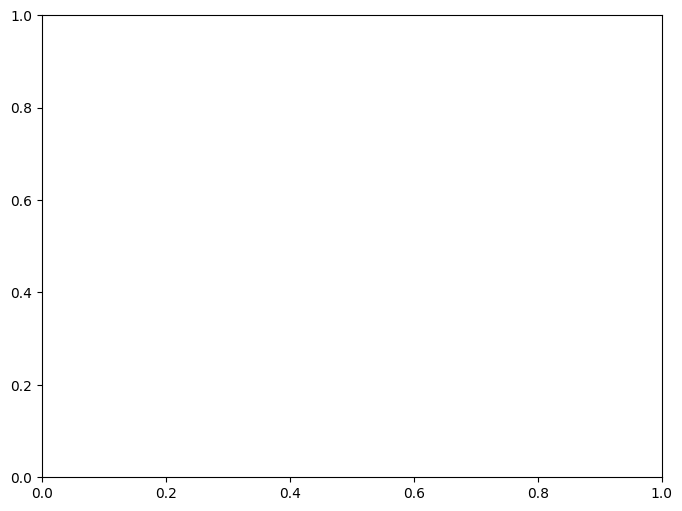

In [51]:
so.Plot.config.theme.update(mpl.rcParams)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

In [47]:
words = ['#ynwa', '#cfc', '#afc', '#lfc', '#mcfc']
file = open('words.txt','w')
for word in words:
	file.write(word+"\n")
file.close()

with open('words.txt', 'r') as textfile:
	words_txt = textfile.read()


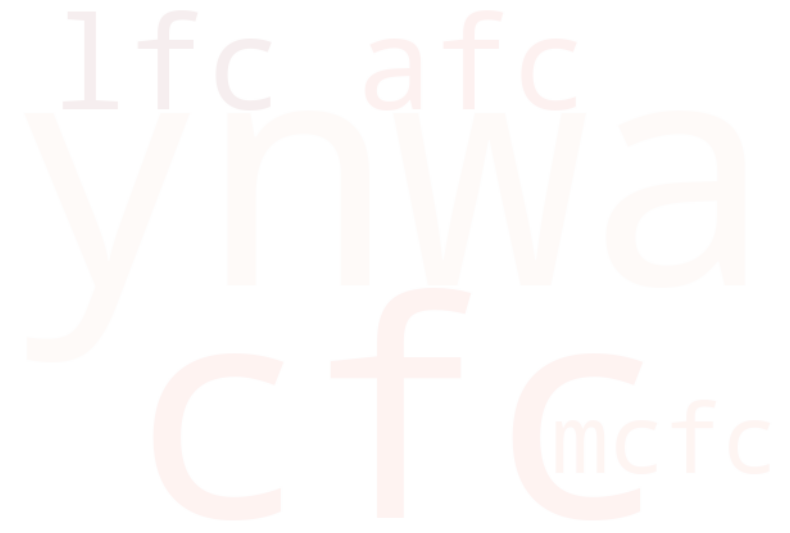

In [88]:
# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=600, height=400,
    background_color='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2  # fix randomness
).generate(words_txt)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# display chart
plt.tight_layout()
plt.show()

In [70]:
sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1
)

sns.lineplot(
    data=top_5_xGD,
    x='gameweek', y='xGD cumulative sum',
    color='darkred',
    ax=sub_ax,
    zorder=5
)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [82]:
sns.lineplot(
    data=top_5_xGD,
    x='gameweek', y='xGD cumulative sum',
    #color='darkred',
    ax=sub_ax,
    zorder=5
)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [106]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=100,
    font_step=2, colormap='magma').generate(words_txt)

In [80]:
#plt.imshow(wordcloud, interpolation="bilinear", alpha=0.3, extent=[xmin, xmax, ymin, ymax])

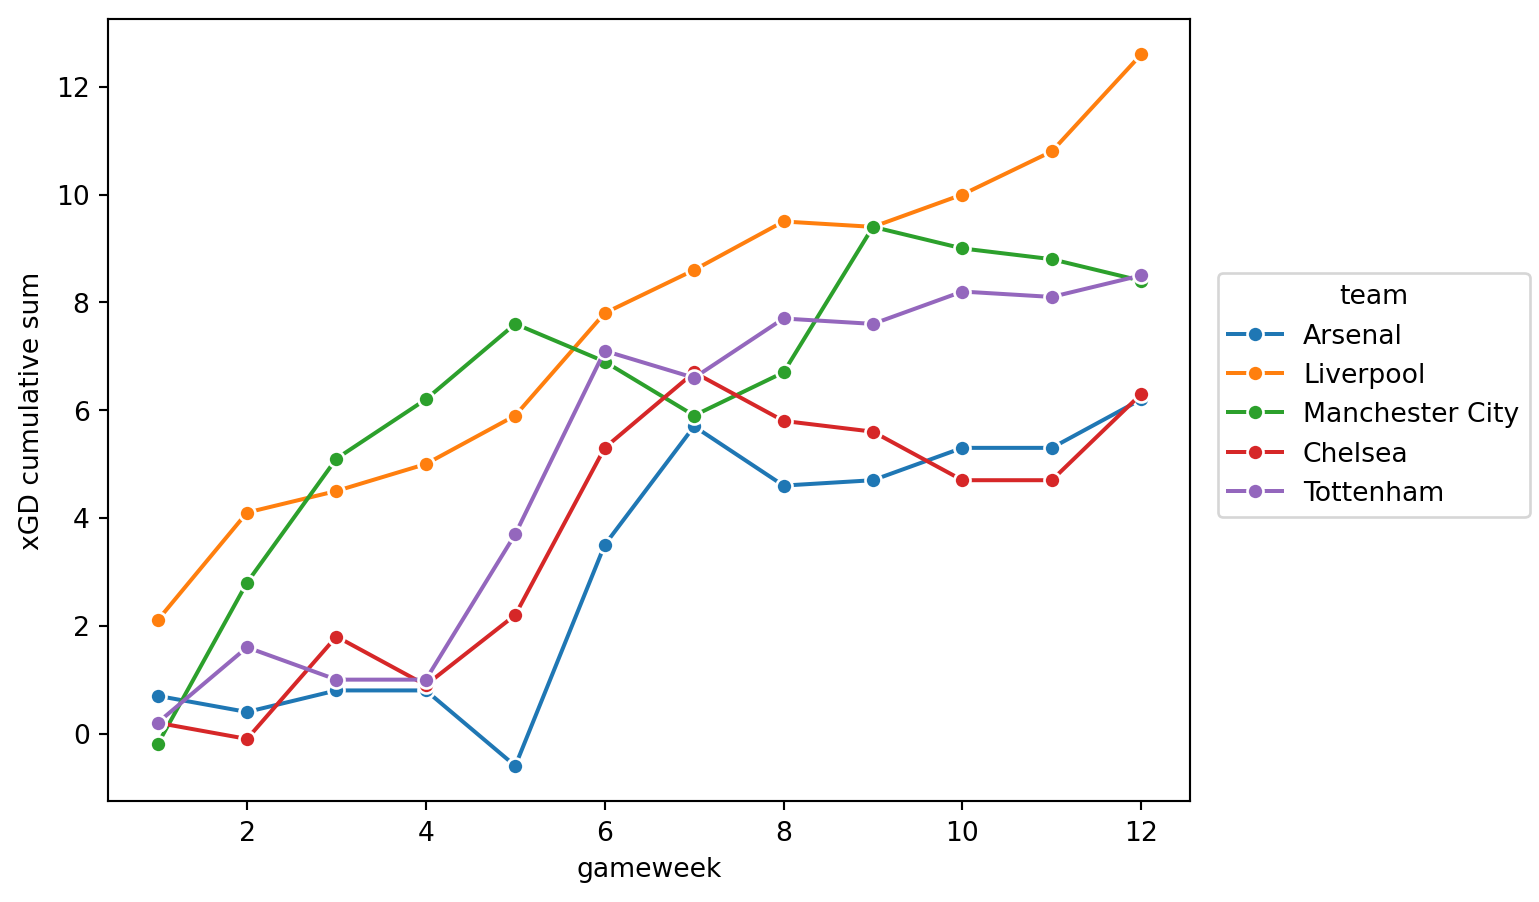

In [83]:

p = so.Plot(top_5_xGD, x='gameweek', y='xGD cumulative sum', color='team')
p.add(so.Line(), so.Agg())
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)




In [92]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

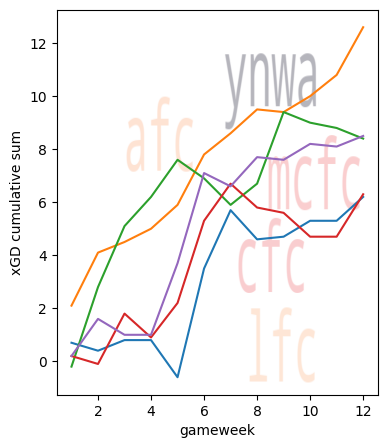

In [112]:
plt.figure(figsize=(14, 5))

palette = sns.color_palette("Blues", as_cmap=True)


ax = sns.lineplot(top_5_xGD, x='gameweek', y='xGD cumulative sum', hue='team')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.imshow(wordcloud, interpolation="bilinear", alpha=0.3, extent=[xmin, xmax, ymin, ymax])

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.legend().set_visible(False)

plt.show()

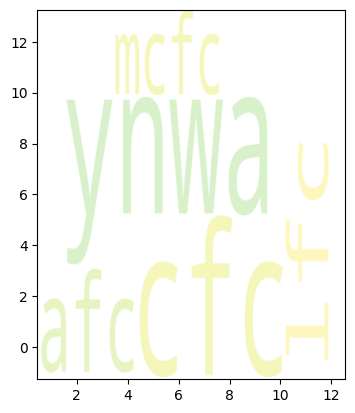

In [94]:
plt.imshow(wordcloud, interpolation="bilinear", alpha=0.3, extent=[xmin, xmax, ymin, ymax])


In [96]:
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()